In [1]:
#!unzip "/content/cell_images.zip"

Streaming output truncated to the last 5000 lines.
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_116.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_118.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_126.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_134.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_141.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_168.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_175.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_183.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_221.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_222.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_102428_cell_87.png  
 extracting: cell_images/Uninfected/C236ThinF_IMG_20151127_

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape, InputLayer

In [2]:
os.chdir('/content/cell_images')
print("Current working directory:", os.getcwd())

Current working directory: /content/cell_images


In [3]:
!ls

Parasitized  Uninfected


In [4]:
sample_parasite_path = 'Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png'
sample_uninfected_path = 'Uninfected/C100P61ThinF_IMG_20150918_144104_cell_128.png'

img1 = cv2.imread(sample_parasite_path)
img2 = cv2.imread(sample_uninfected_path)

print(img1.shape)
print(img2.shape)

(148, 142, 3)
(139, 160, 3)


In [5]:
img1 = cv2.resize(img1, (128, 128))
img2 = cv2.resize(img2, (128, 128))

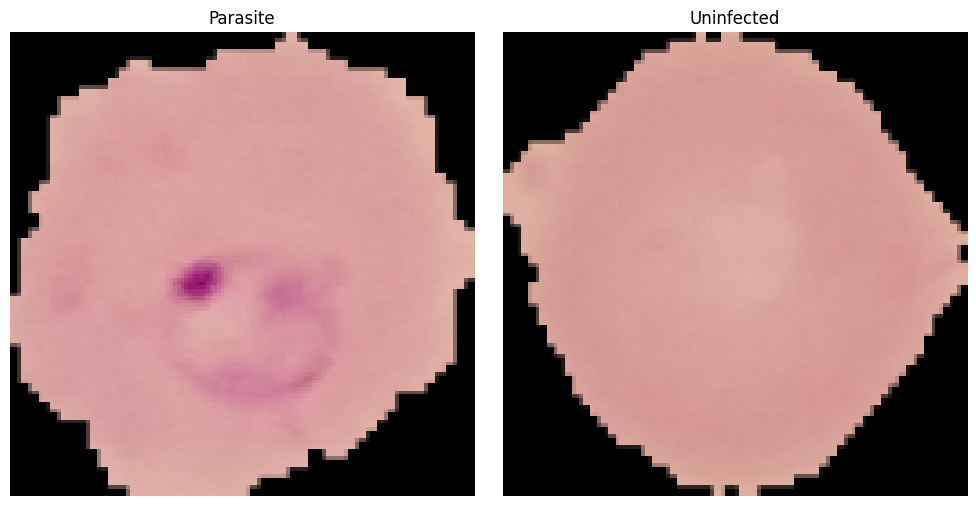

In [6]:
# Assuming img1 and img2 are NumPy arrays (e.g., loaded via cv2 or PIL)
plt.figure(figsize=(10, 5))

# Show img1
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB if using OpenCV
plt.title('Parasite')
plt.axis('off')

# Show img2
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.title('Uninfected')
plt.axis('off')

plt.tight_layout()
plt.show()


In [7]:
parasitized_images = []
uninfected_images = []

parasitized_path = 'Parasitized'
uninfected_path = 'Uninfected'

# Load Parasitized images
for filename in os.listdir(parasitized_path):
    file_path = os.path.join(parasitized_path, filename)
    img = cv2.imread(file_path)
    if img is not None:
      img = cv2.resize(img, (128, 128))
      parasitized_images.append(img)

# Load Uninfected images
for filename in os.listdir(uninfected_path):
    file_path = os.path.join(uninfected_path, filename)
    img = cv2.imread(file_path)
    if img is not None:
      img = cv2.resize(img, (128, 128))
      uninfected_images.append(img)

print(f"Loaded {len(parasitized_images)} parasitized images")
print(f"Loaded {len(uninfected_images)} uninfected images")


Loaded 13779 parasitized images
Loaded 13779 uninfected images


In [8]:
parasitized_images  = parasitized_images [:6000]
uninfected_images = uninfected_images[:6000]

In [9]:
parasitized_images = np.array(parasitized_images, dtype=np.float32) / 255.
uninfected_images = np.array(uninfected_images, dtype=np.float32) / 255.

### MODEL ARCHITECTURE

In [10]:
model = Sequential()

In [11]:
# Input layer
model.add(InputLayer(input_shape=(128, 128, 3)))

# Encoder
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))

# Bottleneck
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))

# Decoder
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))

model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))

# Output layer
model.add(Conv2D(3, (3, 3), activation='sigmoid', padding='same'))

# Compile
model.compile(optimizer='adam', loss='binary_crossentropy')

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 128, 128, 32)   │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 128, 128, 3)    │           867 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 186,371 (728.01 KB)

 Trainable params: 186,371 (728.01 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',     # Metric to monitor
    patience=5,             # Stop after 5 epochs with no improvement
    min_delta=0.0001,        # Minimum change to qualify as improvement
    restore_best_weights=True,  # Revert to best weights after stop
    verbose=1
)

In [13]:
model.fit(uninfected_images[:6000], uninfected_images[:6000],epochs=100,batch_size=32,shuffle=True,validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 25s 89ms/step - loss: 0.5247 - val_loss: 0.4633
Epoch 2/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 29s 67ms/step - loss: 0.4620 - val_loss: 0.4601
Epoch 3/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 62ms/step - loss: 0.4597 - val_loss: 0.4587
Epoch 4/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - loss: 0.4584 - val_loss: 0.4578
Epoch 5/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 11s 67ms/step - loss: 0.4568 - val_loss: 0.4568
Epoch 6/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 63ms/step - loss: 0.4559 - val_loss: 0.4580
Epoch 7/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 9s 63ms/step - loss: 0.4569 - val_loss: 0.4563
Epoch 8/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 11s 67ms/step - loss: 0.4560 - val_loss: 0.4559
Epoch 9/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 9s 63ms/step - loss: 0.4561 - val_loss: 0.4560
Epoch 10/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 11s 66ms/step - loss: 0.4547 - val_loss: 0.4557
Epoch 11/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 10s 62ms/step - loss: 0.4548 - val_loss: 0.4556
Epoch 12/100
150/150 

In [16]:
model.save('autoencoder_model.h5')
from tensorflow.keras.models import load_model
model = load_model('autoencoder_model.h5')

188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step


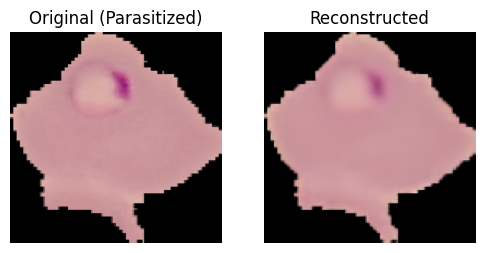

Reconstruction Error: 0.000583


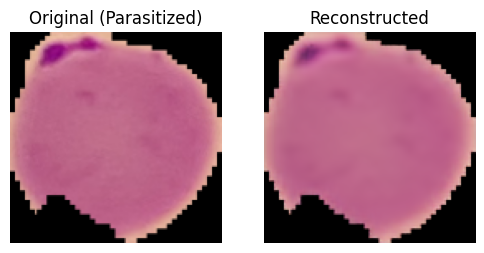

Reconstruction Error: 0.000314


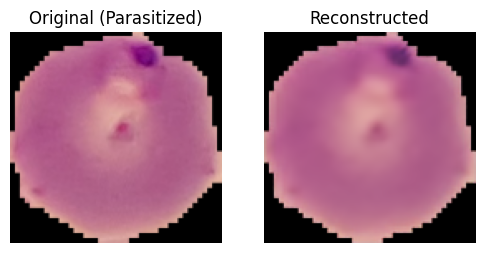

Reconstruction Error: 0.000240


In [17]:
reconstructed = model.predict(parasitized_images)

# Compute reconstruction error (e.g., mean squared error per image)
reconstruction_errors = np.mean(np.square(parasitized_images - reconstructed), axis=(1, 2, 3))


for i in range(3):
    plt.figure(figsize=(6, 3))

    # Original
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(parasitized_images[i], cv2.COLOR_BGR2RGB))
    plt.title("Original (Parasitized)")
    plt.axis('off')

    # Reconstructed
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(reconstructed[i], cv2.COLOR_BGR2RGB))
    plt.title("Reconstructed")
    plt.axis('off')
    plt.show()

    print(f"Reconstruction Error: {reconstruction_errors[i]:.6f}")


In [18]:
reconstructed_uninfected = model.predict(uninfected_images)
uninfected_errors = np.mean(np.square(uninfected_images - reconstructed_uninfected), axis=(1, 2, 3))

threshold = np.mean(uninfected_errors) + 3 * np.std(uninfected_errors)
is_anomaly = reconstruction_errors > threshold
print(f"Detected {np.sum(is_anomaly)} anomalies out of {len(parasitized_images)}")

188/188 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step
Detected 564 anomalies out of 6000
